In [165]:
import os
import numpy as np
import matplotlib.pylab as plt 
import scipy.signal as sg

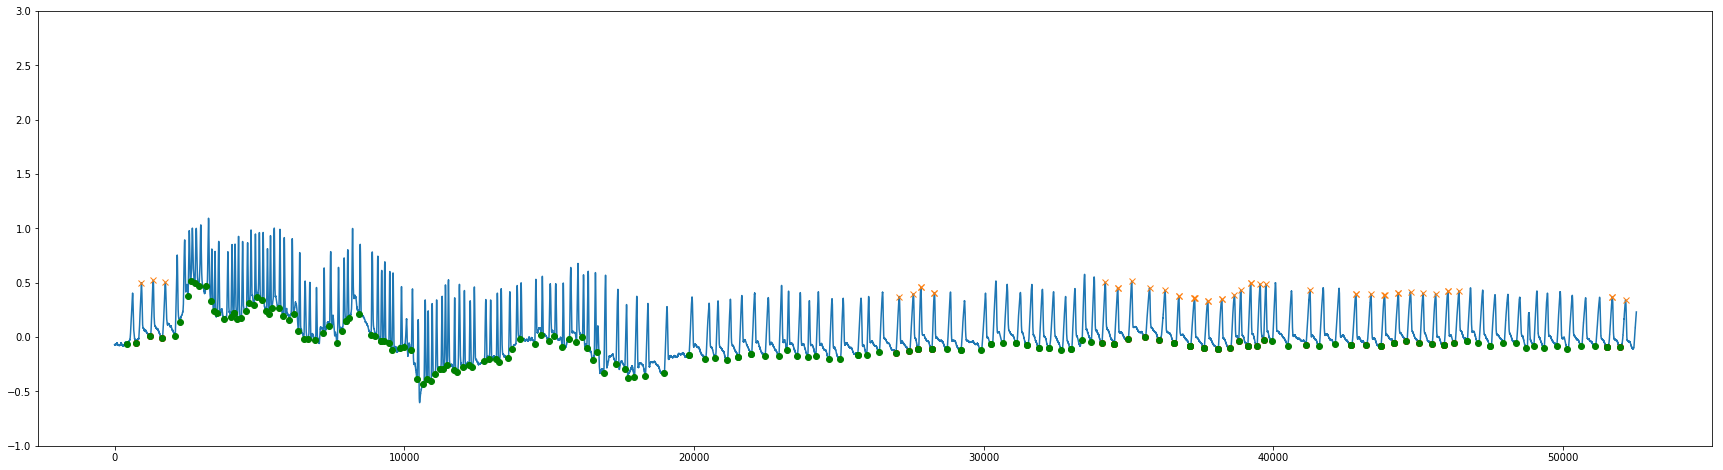

In [280]:
resp = np.genfromtxt('M27699.txt')
resp = np.transpose(resp)[1]
factor = motiondetect(resp)
fig,ax = plt.subplots(figsize = [30,8])
ax.plot(resp)
exp_start = sg.find_peaks(resp,prominence=0.1)
exp_start = exp_start[0]
exp_start_nomotion = factor[exp_start]*exp_start
exp_start_nomotion = exp_start_nomotion[~np.isnan(exp_start_nomotion)].astype(dtype=int)

resp_peaks = resp[exp_start_nomotion]
ax.plot(exp_start_nomotion,resp_peaks,'x')
resp_rev = -resp
resp_low_peaks = sg.find_peaks(resp_rev,prominence=0.005)
resp_low_peaks = resp_low_peaks[0]
resp_start=np.empty(len(exp_start_nomotion),dtype=int)


for i in range(len(exp_start_nomotion)):
    resp_start[i] = resp_low_peaks[np.where(resp_low_peaks<exp_start_nomotion[i])][-1]
    try: 
        exp_next[i] = exp_start[np.where(np.isin(exp_start,exp_start_nomotion[i])+1)]
    except: pass
resp_end=np.empty(len(exp_next),dtype=int)
for k in range(len(exp_next)):
    resp_end[k] = resp_low_peaks[np.where(resp_low_peaks<exp_next[k])][-1]
start = resp[resp_start]
ax.plot(resp_start,start,'ro')
end = resp[resp_end]
ax.plot(resp_end,end,'go')
ylim = plt.ylim(-1,3)

In [223]:
def motiondetect(resp):
    dary= np.array([*map(float, resp)])
    dary -=np.average(test)
    step = np.hstack((np.ones(len(dary)),-1*np.ones(len(dary))))
    dary_step = np.convolve(dary,step,mode='valid')
    factor = np.ones(len(dary_step)-1)
    for i in range(len(dary_step)-1):
        if  np.abs(dary_step[i]/10000)>0.01:
            factor[i] = np.NAN
    else: pass
    
    return factor



In [271]:
resp_start

array([  733,  1232,  1629, 26972, 27438, 27754, 27754, 28207, 28207,
       34077, 34509, 34509, 34996, 35567, 36063, 36578, 36578, 37142,
       37142, 37142, 37614, 37614, 38080, 38080, 38512, 38810, 39116,
       39116, 39432, 39668, 41133, 42696, 42696, 43208, 43717, 43717,
       44170, 44170, 44599, 45047, 45483, 45908, 45908, 46245, 51514,
       51514, 51983])

In [267]:
resp_low_peaks

array([  163,   181,   184,   301,   304,   417,   420,   423,   426,
         733,  1030,  1033,  1171,  1232,  1619,  1622,  1629,  1833,
        1836,  1922,  2087,  2253,  2461,  2535,  2624,  2774,  2897,
        2900,  3108,  3172,  3320,  3430,  3510,  3546,  3654,  3657,
        3694,  3782,  3785,  3788,  3963,  3966,  4012,  4112,  4115,
        4239,  4374,  4484,  4487,  4543,  4546,  4635,  4800,  4803,
        4901,  4904,  4929,  5063,  5066,  5094,  5223,  5226,  5228,
        5232,  5327,  5425,  5428,  5431,  5551,  5658,  5661,  5750,
        5817,  5820,  5902,  6032,  6035,  6185,  6348,  6532,  6667,
        6670,  6673,  6676,  6679,  6682,  6783,  6835,  6838,  6841,
        6890,  6894,  6896,  6900,  6918,  6933,  6936,  7013,  7068,
        7203,  7206,  7277,  7418,  7516,  7604,  7684,  7687,  7785,
        7847,  7984,  8101,  8271,  8444,  8524,  8527,  8840,  9005,
        9008,  9137,  9183,  9186,  9287,  9385,  9462,  9465,  9563,
        9569,  9658,

47